# Supervised, Unsupervised, and Reinforcement Learning

This notebook explores the fundamental differences between supervised, unsupervised, and reinforcement learning. We will define each category, provide examples, and demonstrate basic implementations using Python.

---

## Learning Objectives:
1. Understand the key differences between supervised, unsupervised, and reinforcement learning.
2. See practical examples of each type of learning in action.
3. Learn use cases where each approach is best suited.


1. Supervised Learning Example

Mean Squared Error: 2.6147980548680105


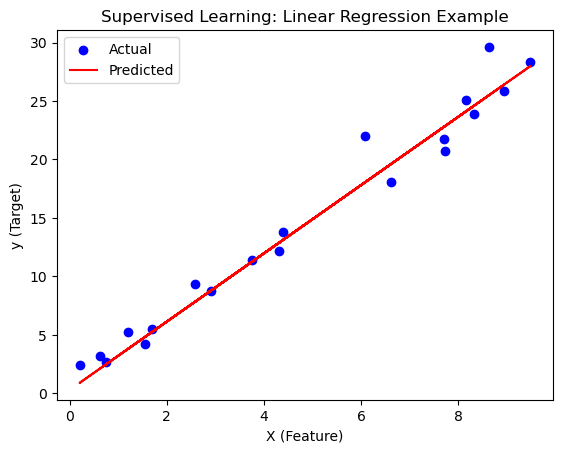

In [1]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating a dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features
y = 3 * X + np.random.randn(100, 1) * 2  # Target with noise

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Visualizing the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.legend()
plt.title("Supervised Learning: Linear Regression Example")
plt.show()


2. Unsupervised Learning Example

C:\Users\Abbas Anwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abbas Anwar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


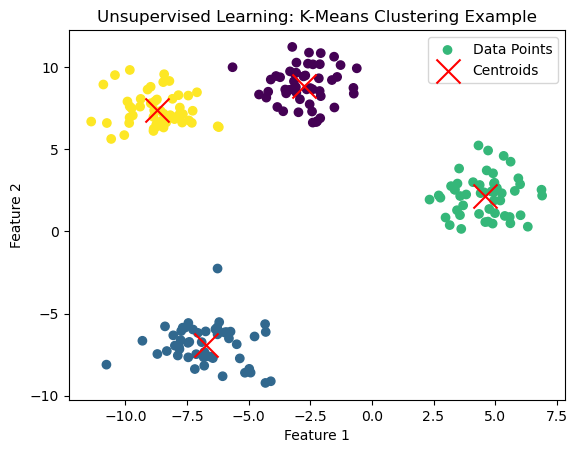

In [2]:
# Importing necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generating a synthetic dataset
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.2, random_state=42)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Unsupervised Learning: K-Means Clustering Example")
plt.show()


3. Reinforcement Learning Example (Basic Q-Learning)

In [3]:
# Importing necessary libraries
import numpy as np

# Defining the environment
states = ['A', 'B', 'C', 'D', 'E']  # Example states
rewards = {
    ('A', 'B'): 1, ('A', 'C'): -1,
    ('B', 'D'): 2, ('C', 'D'): 0,
    ('D', 'E'): 10
}
actions = ['B', 'C', 'D', 'E']

# Initializing the Q-table
q_table = {state: {action: 0 for action in actions} for state in states}

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
episodes = 100

# Training the Q-Learning algorithm
for _ in range(episodes):
    state = 'A'  # Starting state
    while state != 'E':  # Continue until reaching the terminal state
        # Select a random action
        possible_actions = [a for a in actions if (state, a) in rewards]
        action = np.random.choice(possible_actions)
        
        # Get the reward
        reward = rewards.get((state, action), 0)
        
        # Choose the next state
        next_state = action
        
        # Update Q-value
        max_future_q = max(q_table[next_state].values())
        q_table[state][action] += learning_rate * (reward + discount_factor * max_future_q - q_table[state][action])
        
        # Transition to the next state
        state = next_state

# Displaying the Q-table
import pandas as pd
print("Q-Table:")
pd.DataFrame(q_table).transpose()


Q-Table:


,B,C,D,E
A,10.262879,6.709003,0.000000,0.000000
B,0.000000,0.000000,10.868343,0.000000
C,0.000000,0.000000,8.923560,0.000000
D,0.000000,0.000000,0.000000,9.999734
E,0.000000,0.000000,0.000000,0.000000


---

## Summary
1. **Supervised Learning**: Requires labeled data, demonstrated using Linear Regression.
2. **Unsupervised Learning**: No labels needed, demonstrated using K-Means Clustering.
3. **Reinforcement Learning**: Learning through trial and error, demonstrated using Q-Learning.

Each learning paradigm has specific use cases and applications. Understanding these differences is crucial for selecting the appropriate approach for a given problem.
